In [5]:
import numpy as np
import matplotlib.pyplot as plt

#### 线性回归

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

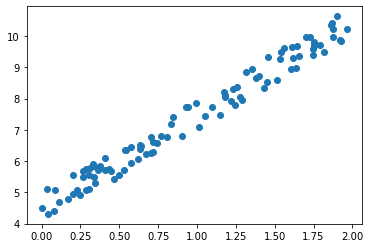

In [7]:
plt.scatter(X, y)
plt.show()

In [14]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 

In [15]:
theta_best

array([[4.51396302],
       [2.97222435]])

In [18]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51396302],
       [10.45841173]])

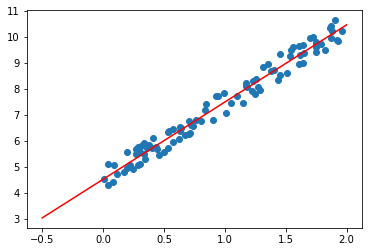

In [35]:
x = np.linspace(-0.5,2,100)
y_line= theta_best[0] + theta_best[1] * x
plt.scatter(X, y)
plt.plot(x,y_line,"r-")
plt.show()

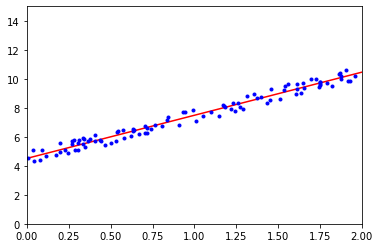

In [36]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

用sklearn执行线性回归

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

[4.51396302]
[[2.97222435]]


#### 梯度下降

使用批量梯度下降

In [38]:
eta = 0.1
n_ierations = 1000
m = 100

theta = np.random.rand(2,1)

for iteration in range(n_ierations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
print(theta)

[[4.51396302]
 [2.97222435]]


使用随机梯度下降

In [40]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[4.51024749]
 [2.9720667 ]]


使用sklearn包

In [44]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter= 1000,tol= 1e-3, penalty= None, eta0= 0.1)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[4.50591216]
[2.99578633]
